# 1st Task

-   [1] Run the code to produce a Gaussian histogram with a curve 
-   [2] Modify the code to see how different inputs create a different distribution and fit
-   [3] Run the code to produce a Gamma distribution and fit, normalize it, check it with shape (k) = 1?
-   [4] Make your own function to generate Gaussian distribution and fit your distribution using curve_fit
-   [5] Find the appropirate lower and upper limits for loaded data and make a histogram
-   [6] Try to fit the distribution with a Gaussian, Limit the range of data plotted if need be 

## Bonus

-   [1] Change the figure size, labels and fontsizes 


# useful links
#to generate ramdom distributions 
https://numpy.org/doc/stable/search.html?q=numpy.random
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

#for plotting histograms in matplotlib
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

#to use scipy.stats for fit
https://docs.scipy.org/doc/scipy/reference/stats.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit

#scipy curve_fit 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

#loading data using pandas dataframe:
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.htmls

In [1]:
#Before we start, we have to import libraries of functions that we will need

#access to the numpy library for vectors, arrays, and other math
import numpy as np
#access to the matplotlib's plotting features
import matplotlib.pyplot as plt
#access to scipy's statistics library 
from scipy import stats
#Optimize library for fitting functions
from scipy.optimize import curve_fit
# Loading/reading the data using pandas
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


mu: 5.001906674902477  sig: 0.9991196346554538


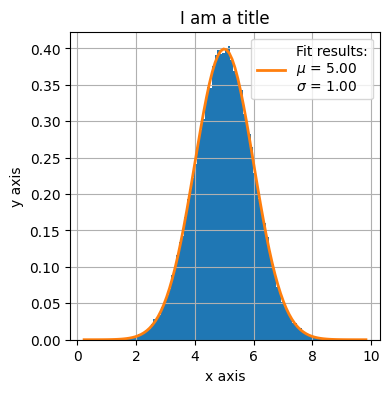

In [2]:
#Defining our function
def gaussian():
    # Variables for the Gaussian
    num = 100000
    mean = 5.0
    sigma = 1.0

    # generate some data wiht a normal(gaussian) distribution using numpy random
    data = np.random.normal(loc=mean, scale=sigma, size=num)
    # create a figure with a size of 4x4 inches
    plt.figure(figsize=(4, 4))
    # Plot the random data
    plt.hist(data, bins=100, density=True)

    # Fit a normal distribution to the data using scipy stats
    mu, std = stats.norm.fit(data)
    print("mu:", mu, " sig:", std)
    # Get the min and max from the histogram
    xmin, xmax = plt.xlim()
    # Make a set of xs to plot the distribution
    x = np.linspace(xmin, xmax, 100)
    # Get the y values in the x range
    y = stats.norm.pdf(x, mu, std)

    # Plot the line and set the legend and show the plots
    plt.plot(x, y, linewidth=2, label="Fit results:\n$\mu$ = %.2f\n$\sigma$ = %.2f" % (mu, std))
    #Add Some titles for the plot and axes
    plt.title("I am a title")
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.legend()
    plt.grid()
    plt.show()


gaussian()

In [ ]:
# You can also make your own functions rather than ones from distinct libraries
# make our own gamma function
def gamma_func(x, amp, shape, scale):
    return amp*(pow(x, (shape-1))* np.exp(-x/scale)/(pow(scale,shape) *np.math.gamma(shape)))
# lets define function for fit
def gamma_fit():
    #Variables for the gamma
    k = 5.0
    theta = 0.5
    num = 10000
    num_bins = 100
    # specifying seed for random number generation
    np.random.seed(0)
    # generate some data with a gamma distribution using numpy random
    #scale s related to variance, shape with skewness
    data = np.random.gamma(shape=k, scale=theta, size=num)
    # create a figure with a size of 4x4 inches
    plt.figure(figsize=(4, 4))
    # Plot the data you generated
    plt.hist(data, bins=num_bins, density=True)
    # Extract the frequency values and bin edges
    hist, bin_edges = np.histogram(data, bins=num_bins, density=True)
    # calculate bin centers
    bin_center = (bin_edges[1:] + bin_edges[:-1]) / 2
    # make your guess for the parameters
    guess = [1000, 5.0, 0.5]
    # Use curve_fit to extract fit parameters for the fit function from a set of x and hist data with an initial guess
    param, param_cov = curve_fit(gamma_func, bin_center, hist, p0=guess, maxfev=5000)

    print("curve_fit parameters: ", param)
#     print("curve_fit covariance: ",param_cov)

    # Make a set of xs data to plot the distribution
    x = np.linspace(bin_edges[0], bin_edges[-1], 100)
    # Get the y values in the x range
    y = gamma_func(x, *param)
    #     y = gaus(x,param[0],param[1],param[2])
    # Plot the line and set the legend and show the plots
    plt.plot(x, y, linewidth=2, color='r', label="Fit results:\namplitude = %.2f \nshape = %.2f\nscale = %.2f" % (param[0], param[1], param[2]))
    # Add Some titles for the plot and axes
    plt.title("I am also a title")
    plt.xlabel("x axis")
    plt.ylabel("why axis")
    plt.legend()
    plt.grid()
    plt.show()


# Call the function
gamma_fit()

In [ ]:

# Now time to define gaussian and fit the data exactly you did in previous task
# Make your own function to return gaussian pdf
def gaus(x, amplitude, mean, sigma):
    return 
# New gaussian fitting program using scipy.optimize for fitting 
def gaussian_fit():
    #Variables for the Gaussian
    
    # generate some data with a gamma distribution using numpy random
    
    # create a figure and plot the data you generated
    
    # Extract the values and bin edges and calculate bin centers
    
    # make your guess for the parameters
    
    # Use curve_fit to extract fit parameters for the fit function from a set of x and y data with an initial guess
    
    # Make a set of xs data to plot the distribution
    
    # Get the y values in the x range
    
    # Plot the line and set the legend and show the plots
    
    # Add Some titles for the plot, axes and show 



# Call the function
gaussian_fit()

In [ ]:
# Loading/reading the data is done for you using pandas
#Here is our panda dataframe new_data
new_data = pd.read_csv('distribution.dat', sep='\t', names=[''])
# get the minimum, maximum values and discription of the DataFrame
print('Minimum value:', new_data.min())
print('Maximum value:', new_data.max())
print('Describe data:', new_data.describe(percentiles=[0.01, 0.05, .1, .2, .3, .4, .5, .6, .7, .8, .9, 0.95, 0.99]))

# use your intuition to get reasonable lower and upper limits of new_data, so your fit will show up nicely
lower_edge= -999
upper_edge= 999
# cut-out your outliers using this code
new_data = new_data[(new_data.to_numpy() > lower_edge) & (new_data.to_numpy() < upper_edge)]


# # Now time to define new gaussian and fit the data exactly you did in previous task
# # Make your own function to return gaussian pdf
# def gaus(x, amplitude, mean, sigma):
#     return  
# ###### Follow previous task, no need to generate data use new_data instead